In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardiovascular-disease-dataset/Cardiovascular_Disease_Dataset/Cardiovascular_Disease_Dataset.csv
/kaggle/input/cardiovascular-disease-dataset/Cardiovascular_Disease_Dataset/Cardiovascular_Disease_Dataset_Description.pdf


In [10]:
df = pd.read_csv('/kaggle/input/cardiovascular-disease-dataset/Cardiovascular_Disease_Dataset/Cardiovascular_Disease_Dataset.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


No null data entry

In [14]:
df.describe(include='all')

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


Text(0.5, 1.0, 'Correlations')

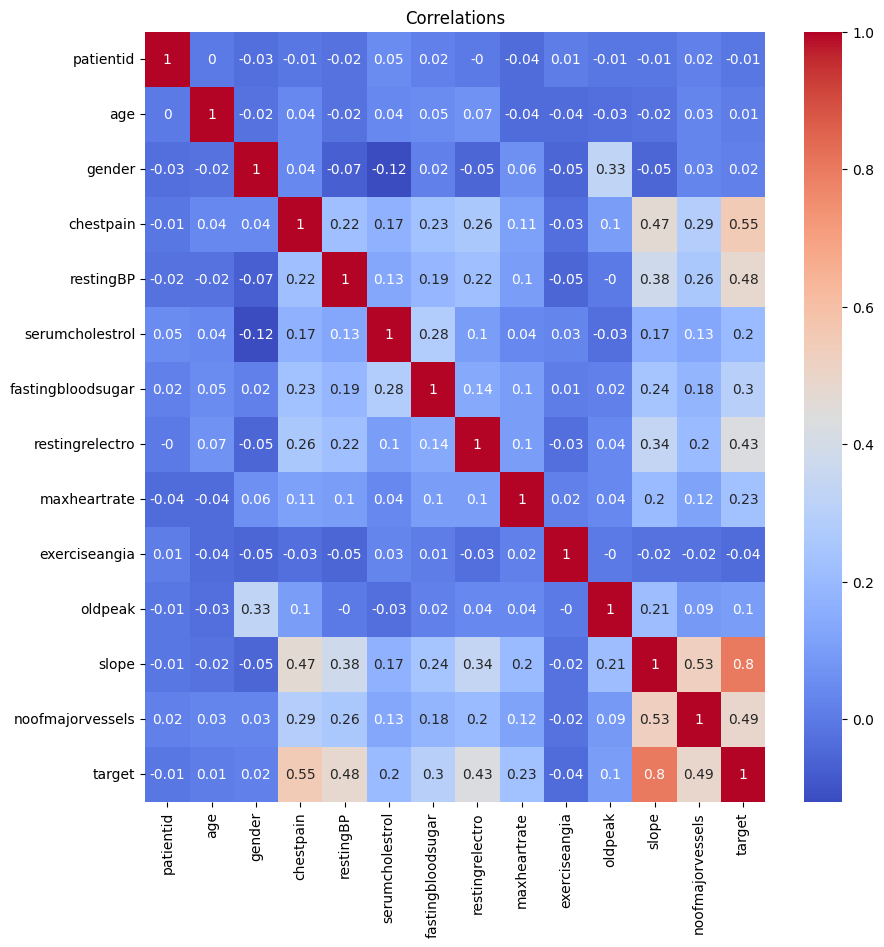

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().round(2),annot=True,cmap='coolwarm')
plt.title('Correlations')

In [27]:
df.gender.value_counts()

gender
1    765
0    235
Name: count, dtype: int64

In [29]:
male = df[df.gender==1]
female = df[df.gender==0]

In [30]:
  male.restingBP.mean()

150.58954248366013

In [31]:
female.restingBP.mean()

155.51489361702127

In [32]:
from scipy.stats import ttest_ind

t_statistic,p_value = ttest_ind(male.restingBP,female.restingBP)

if p_value<0.05:
    print('The difference in means is statistically significant')
else:
    print('The difference in means is not statistically significant')

The difference in means is statistically significant


In [33]:
male.maxheartrate.mean()

146.70065359477124

In [34]:
female.maxheartrate.mean()

141.4936170212766

In [35]:

t_statistic,p_value = ttest_ind(male.maxheartrate,female.maxheartrate)

if p_value<0.05:
    print('The difference in means is statistically significant')
else:
    print('The difference in means is not statistically significant')

The difference in means is statistically significant


Males on average have a higher max heart rate.

Males on average have a higher resting BP; Blood Pressure.

In [37]:
t_statistic, p_value = ttest_ind(male.serumcholestrol,female.serumcholestrol)

if p_value<0.05:
    print('The difference in means is statistically significant')
else:
    print('The difference in means is not statistically significant')

The difference in means is statistically significant


In [38]:
male.serumcholestrol.mean()

302.5869281045752

In [39]:
female.serumcholestrol.mean()

340.2893617021277

Text(0.5, 1.0, 'Is there a difference in Serum-Cholestrol of males and females?')

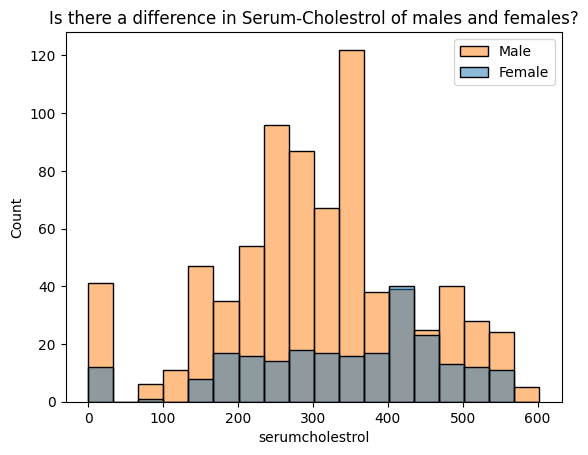

In [52]:
sns.histplot(x=df.serumcholestrol,hue=df.gender)
plt.legend(['Male','Female'])
plt.title('Is there a difference in Serum-Cholestrol of males and females?')